In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import ruptures as rpt

### Data 
Filter for the county that was assigned for analysis and the required date range.

Name: Will County, Illinois

Date range: Feb 1, 2020 to Oct 1, 2021

In [2]:
covid_cases = pd.read_csv("RAW_us_confirmed_cases.csv")
mask_use = pd.read_csv("mask-use-by-county.csv")
mask_mandate = pd.read_csv("Public_Mask_Mandates.csv")

In [3]:
covid_cases.head()


,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22,11/1/22
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,18480,18480,18480,18480,18511,18511,18511,18511,18511,18511
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,65895,65895,65895,65895,65973,65973,65973,65973,65973,65973
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,6926,6926,6926,6926,6930,6930,6930,6930,6930,6930
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,7560,7560,7560,7560,7575,7575,7575,7575,7575,7575
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,17286,17286,17286,17286,17320,17320,17320,17320,17320,17320


In [4]:
mask_use.head()


,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


In [5]:
mask_mandate.head()


,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,4/14/2020,2,NaN,NaN,NaN,NaN


In [6]:
# Extracting data for Will, Illinois

covid_cases = covid_cases.loc[(covid_cases['Province_State'] == 'Illinois') & (covid_cases['Admin2'] == 'Will')]

In [7]:
covid_cases.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22,11/1/22
727,Illinois,Will,84017197,US,USA,840,17197.0,US,41.446193,-87.978627,...,201734,201979,202085,202208,202303,202455,202455,202455,202731,202803


Only one row of data was returned for the covid cases for Will County for a range of dates, because all dates and the cases recorded are a seperate column. Let's clean this before we proceed further

In [8]:
# Extracting mask use data
mask_use = mask_use.loc[mask_use['COUNTYFP'] == 17197]
mask_use.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
693,17197,0.041,0.024,0.062,0.134,0.739


In [9]:
# Extracting mask mandate data
mask_mandate =  mask_mandate.loc[(mask_mandate["FIPS_State"] == 17) & (mask_mandate["FIPS_County"] == 197)]
mask_mandate.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
184121,IL,Will County,17,197,4/19/2020,2,NaN,NaN,NaN,NaN
184217,IL,Will County,17,197,4/20/2020,2,NaN,NaN,NaN,NaN
184313,IL,Will County,17,197,4/21/2020,2,NaN,NaN,NaN,NaN
184341,IL,Will County,17,197,4/10/2020,2,NaN,NaN,NaN,NaN
184342,IL,Will County,17,197,4/11/2020,2,NaN,NaN,NaN,NaN


In [10]:
# Pivot the data
covid_cases = covid_cases.melt(id_vars=["Province_State", "Admin2", "UID", "iso2","iso3",
 'code3',
 'FIPS',
 'Country_Region',
 'Lat',
 'Long_',
 'Combined_Key'], 
        var_name="Date", 
        value_name="Value")

In [11]:
covid_cases.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Date,Value
0,Illinois,Will,84017197,US,USA,840,17197.0,US,41.446193,-87.978627,"Will, Illinois, US",1/22/20,0
1,Illinois,Will,84017197,US,USA,840,17197.0,US,41.446193,-87.978627,"Will, Illinois, US",1/23/20,0
2,Illinois,Will,84017197,US,USA,840,17197.0,US,41.446193,-87.978627,"Will, Illinois, US",1/24/20,0
3,Illinois,Will,84017197,US,USA,840,17197.0,US,41.446193,-87.978627,"Will, Illinois, US",1/25/20,0
4,Illinois,Will,84017197,US,USA,840,17197.0,US,41.446193,-87.978627,"Will, Illinois, US",1/26/20,0


In [12]:
covid_cases = covid_cases[["Province_State", "Admin2","Date", "Value"]]

In [13]:
covid_cases.head()

,Province_State,Admin2,Date,Value
0,Illinois,Will,1/22/20,0
1,Illinois,Will,1/23/20,0
2,Illinois,Will,1/24/20,0
3,Illinois,Will,1/25/20,0
4,Illinois,Will,1/26/20,0


In [14]:
covid_cases["Date"] = pd.to_datetime(covid_cases["Date"])

In [15]:
covid_cases = covid_cases[(covid_cases["Date"] >= "2020-02-01") & (covid_cases["Date"] <= "2021-10-01")]
covid_cases.sort_values(by="Date", inplace=True)
covid_cases.head()

,Province_State,Admin2,Date,Value
10,Illinois,Will,2020-02-01,0
11,Illinois,Will,2020-02-02,0
12,Illinois,Will,2020-02-03,0
13,Illinois,Will,2020-02-04,0
14,Illinois,Will,2020-02-05,0


In [16]:
mask_mandate["date"] = pd.to_datetime(mask_mandate["date"])
mask_mandate = mask_mandate[(mask_mandate["date"] >= "2020-02-01") & (mask_mandate["date"] <= "2021-10-01")]
mask_mandate.head()


,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
184121,IL,Will County,17,197,2020-04-19,2,NaN,NaN,NaN,NaN
184217,IL,Will County,17,197,2020-04-20,2,NaN,NaN,NaN,NaN
184313,IL,Will County,17,197,2020-04-21,2,NaN,NaN,NaN,NaN
184341,IL,Will County,17,197,2020-04-10,2,NaN,NaN,NaN,NaN
184342,IL,Will County,17,197,2020-04-11,2,NaN,NaN,NaN,NaN


In [17]:
covid_cases.to_csv("covid_cases.csv", index=False)
mask_use.to_csv("mask_use.csv", index=False)
mask_mandate.to_csv("mask_mandate.csv", index=False)

### Analysis

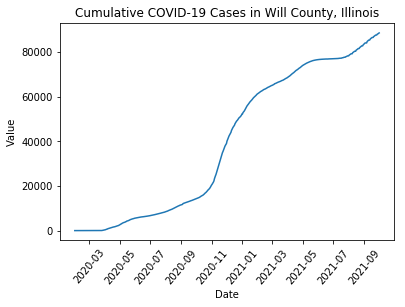

In [18]:
sns.lineplot(data=covid_cases, x="Date", y="Value");
plt.title("Cumulative COVID-19 Cases in Will County, Illinois");
plt.xticks(rotation=50);

The raw data file has cumulative case counts. We want to see daily cases so we take a day by day difference.

In [19]:
covid_cases["daily_cases"] = covid_cases["Value"].diff()
covid_cases.head()

,Province_State,Admin2,Date,Value,daily_cases
10,Illinois,Will,2020-02-01,0,NaN
11,Illinois,Will,2020-02-02,0,0.0
12,Illinois,Will,2020-02-03,0,0.0
13,Illinois,Will,2020-02-04,0,0.0
14,Illinois,Will,2020-02-05,0,0.0


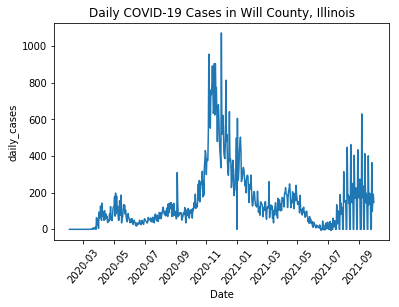

In [20]:
sns.lineplot(data=covid_cases, x="Date", y="daily_cases");
plt.title("Daily COVID-19 Cases in Will County, Illinois");
plt.xticks(rotation=50);

It looks very noisy and has a lot of fluctuations, so I will use a moving average with a window of 7 days because case reporting might not be as efficient on weekends as it might be on other days, and hence a fluctuations on weekends and weekday transitions

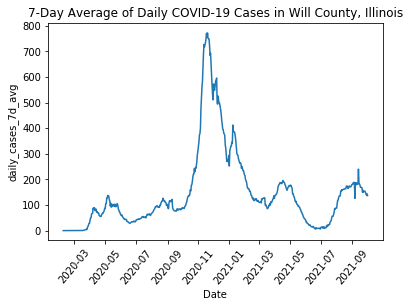

In [21]:
covid_cases["daily_cases_7d_avg"] = covid_cases["daily_cases"].rolling(7).mean()
sns.lineplot(data=covid_cases, x="Date", y="daily_cases_7d_avg");
plt.title("7-Day Average of Daily COVID-19 Cases in Will County, Illinois");
plt.xticks(rotation=50);

We want to explore how masking policies affected the spread of COVID-19. For this we could observe the rate of change of daily COVID-19 cases around the time masking policies were enforced.

Let us calculate the day-over-day change in COVID cases and visualize it. We will calculate the percentage over the 7-day average since the daily change can be very noisy without smothing the series.

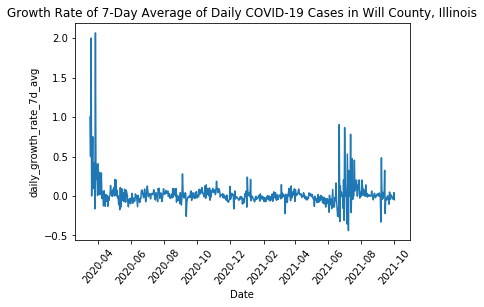

In [22]:
covid_cases["daily_growth_rate_7d_avg"] = covid_cases["daily_cases_7d_avg"].pct_change()
sns.lineplot(data=covid_cases, x="Date", y="daily_growth_rate_7d_avg");
plt.title("Growth Rate of 7-Day Average of Daily COVID-19 Cases in Will County, Illinois");
plt.xticks(rotation=50);


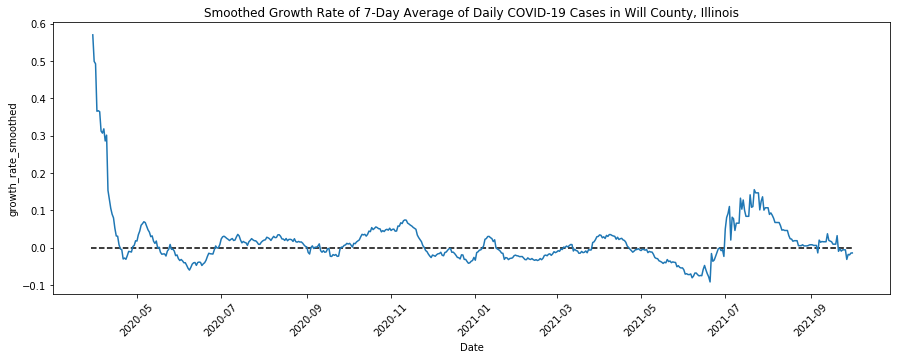

In [23]:
covid_cases["growth_rate_smoothed"] = covid_cases["daily_growth_rate_7d_avg"].rolling(14).mean()
plt.figure(figsize=(15,5))
sns.lineplot(data=covid_cases.loc[67:,:], x="Date", y="growth_rate_smoothed");
plt.hlines(0, covid_cases.loc[67, "Date"], covid_cases["Date"].max(), linestyles='dashed')
plt.title("Smoothed Growth Rate of 7-Day Average of Daily COVID-19 Cases in Will County, Illinois");
plt.xticks(rotation=45);

A 14-day smoothing window allows us to observe the over-arching trend. We can now try to plot the dates where mandates were introduced and changed as vertical lines and check if there are any interesting patterns. There seems to be a lot of fluctuation when we model the daily data.

We can first interpolate the mask mandate dates on this plot and see if we can see anything interesting. Else we can repeat this on weekly rolled up data.

We can also check if vaccinations had an effect on growth rate using this strategy.

The horizontal 0 line helps us see when case growth increasing or decreasing.

In [24]:
mask_mandate.head()


,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
184121,IL,Will County,17,197,2020-04-19,2,NaN,NaN,NaN,NaN
184217,IL,Will County,17,197,2020-04-20,2,NaN,NaN,NaN,NaN
184313,IL,Will County,17,197,2020-04-21,2,NaN,NaN,NaN,NaN
184341,IL,Will County,17,197,2020-04-10,2,NaN,NaN,NaN,NaN
184342,IL,Will County,17,197,2020-04-11,2,NaN,NaN,NaN,NaN


The date range for this variable is longer. Perhaps the NaNs in the Face_Masks_Required_in_Public indicate no mandate issued, we can fill those values as No since there are no other breakages in the graph

In [25]:
mask_mandate["Face_Masks_Required_in_Public"] = mask_mandate["Face_Masks_Required_in_Public"].fillna("No")
mask_mandate

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
184121,IL,Will County,17,197,2020-04-19,2,No,NaN,NaN,NaN
184217,IL,Will County,17,197,2020-04-20,2,No,NaN,NaN,NaN
184313,IL,Will County,17,197,2020-04-21,2,No,NaN,NaN,NaN
184341,IL,Will County,17,197,2020-04-10,2,No,NaN,NaN,NaN
184342,IL,Will County,17,197,2020-04-11,2,No,NaN,NaN,NaN
184343,IL,Will County,17,197,2020-04-12,2,No,NaN,NaN,NaN
184344,IL,Will County,17,197,2020-04-13,2,No,NaN,NaN,NaN
184345,IL,Will County,17,197,2020-04-14,2,No,NaN,NaN,NaN
184346,IL,Will County,17,197,2020-04-15,2,No,NaN,NaN,NaN
184347,IL,Will County,17,197,2020-04-16,2,No,NaN,NaN,NaN


In [26]:
#find the changepoints of the mandate.
mask_mandate.sort_values("date", inplace=True)
mask_mandate["Face_Masks_Required_Lag"] = mask_mandate["Face_Masks_Required_in_Public"].shift(1)
mask_mandate

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,Face_Masks_Required_Lag
184341,IL,Will County,17,197,2020-04-10,2,No,NaN,NaN,NaN,NaN
184342,IL,Will County,17,197,2020-04-11,2,No,NaN,NaN,NaN,No
184343,IL,Will County,17,197,2020-04-12,2,No,NaN,NaN,NaN,No
184344,IL,Will County,17,197,2020-04-13,2,No,NaN,NaN,NaN,No
184345,IL,Will County,17,197,2020-04-14,2,No,NaN,NaN,NaN,No
184346,IL,Will County,17,197,2020-04-15,2,No,NaN,NaN,NaN,No
184347,IL,Will County,17,197,2020-04-16,2,No,NaN,NaN,NaN,No
184348,IL,Will County,17,197,2020-04-17,2,No,NaN,NaN,NaN,No
184349,IL,Will County,17,197,2020-04-18,2,No,NaN,NaN,NaN,No
184121,IL,Will County,17,197,2020-04-19,2,No,NaN,NaN,NaN,No


In [27]:
mask_mandate["Face_Masks_Required_Lag"] = mask_mandate["Face_Masks_Required_Lag"].fillna("No")
mask_mandate[mask_mandate["Face_Masks_Required_Lag"] != mask_mandate["Face_Masks_Required_in_Public"]]

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,Face_Masks_Required_Lag
184359,IL,Will County,17,197,2020-05-01,1,Yes,Official,https://www2.illinois.gov/Documents/ExecOrders...,"Ill. Exec. Order No. 2020-32 (Apr. 30, 2020)",No
1017665,IL,Will County,17,197,2021-06-11,2,No,Official,https://coronavirus.illinois.gov/content/dam/s...,"Ill. Exec. Order No. 2021-12 (June 11, 2021)",Yes


In [28]:
mask_no_1 = covid_cases.loc[67, "Date"].to_pydatetime(), mask_mandate.loc[mask_mandate["date"] == '2020-05-01',"date"].dt.to_pydatetime()[0]
mask_yes = mask_mandate.loc[mask_mandate["date"] == '2020-05-01',"date"].dt.to_pydatetime()[0], mask_mandate.loc[mask_mandate["date"] == '2021-06-11',"date"].dt.to_pydatetime()[0]
mask_no_2 = mask_mandate.loc[mask_mandate["date"] == '2021-06-11',"date"].dt.to_pydatetime()[0], covid_cases["Date"].max().to_pydatetime()


### Visualization

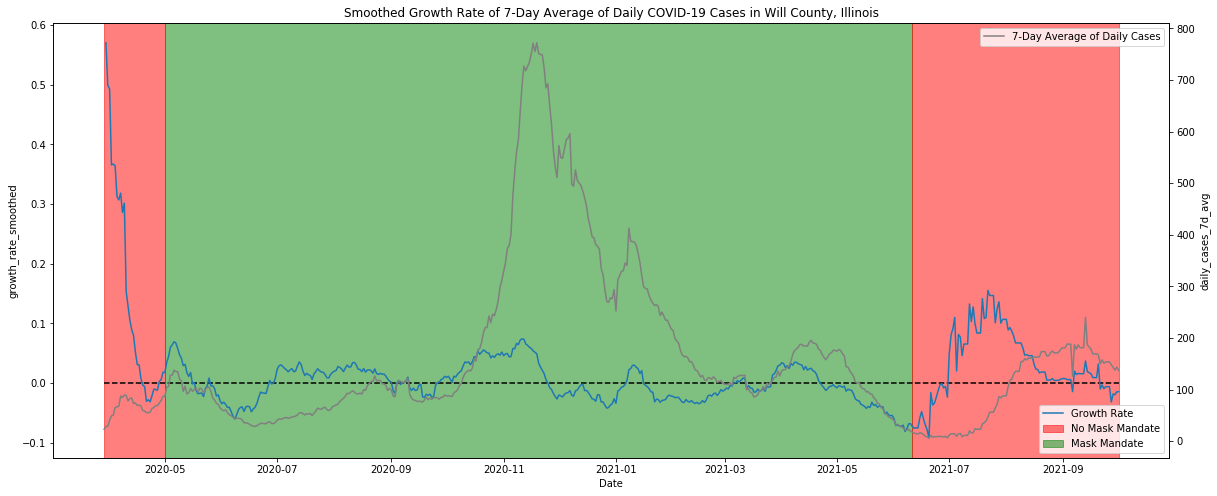

In [29]:
plt.figure(figsize=(20,8))
ax = sns.lineplot(data=covid_cases.loc[67:,:], x="Date", y="growth_rate_smoothed", label="Growth Rate");
ax.axvspan(mask_no_1[0], mask_no_1[1], alpha=0.5, color='red', label="No Mask Mandate")
ax.axvspan(mask_yes[0], mask_yes[1], alpha=0.5, color='green', label="Mask Mandate")
ax.axvspan(mask_no_2[0], mask_no_2[1], alpha=0.5, color='red')
ax.legend(loc="lower right")

ax.hlines(0, covid_cases.loc[67, "Date"], covid_cases["Date"].max(), linestyles='dashed')
ax2 = plt.twinx()
sns.lineplot(data=covid_cases.loc[67:,:], x="Date", y="daily_cases_7d_avg", ax=ax2, color="grey", label="7-Day Average of Daily Cases");
plt.title("Smoothed Growth Rate of 7-Day Average of Daily COVID-19 Cases in Will County, Illinois");
plt.xticks(rotation=45);


The graph above depicts the daily increase in COVID-19 cases. I reduced noise by first taking a moving average of daily COVID cases and then calculating the percentage growth in cases day over day. Because this was also noisy, I used another moving average to smooth out the visualization. 
 
I truncated some of the dates early in the pandemic because the percentage change in a smaller number of cases was unstable, making it difficult to view the rest of the pandemic. 

The second axis depicts a moving average of COVID-19 cases reported each day.

This graph shows that much of the growth rate is decreasing in the green area of the chart, and the majority of the negative growth rate (i.e. falling daily cases) is also in the green region. While this appears to be a good correlation, it cannot be concluded to be causation because many interventions were implemented during the pandemic. 

More importantly, vaccines were made available in this country beginning in February 2021, and they are likely to have played a role in containing the growth as well, though this needs to be investigated further. 
